In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
data = pd.read_csv('h1n1_vaccine_prediction.csv')
data.dtypes


unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [4]:
data = data.drop(columns=['unique_id'])
data.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [5]:
data_category_column = data.columns[data.dtypes=='object']  #Which of the columns are category type


In [6]:
data_numeric_column = data.columns[data.dtypes!='object'] #Which of the columns are of numeric type


In [7]:
print(data_category_column) #Names of category columns


Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')


In [8]:
print(data_numeric_column) #Names of numeric columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [10]:
#Create data sub sets
data_category = data[data_category_column]  #Category Data
data_numeric = data[data_numeric_column]   #Numeric Data
data_category.shape
data_numeric.shape
data_category.head()
data_numeric.head()


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [11]:
#Check for missing data
data_category.isna().sum().sort_values(ascending=False)
data_numeric.isna().sum().sort_values(ascending=False)


has_health_insur             12274
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_adults                   249
no_of_children                 249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
h1n1_vaccine                     0
dtype: int64

In [12]:
#Categorical imputation using lambda functionlambda x: x.fillna(x.value_counts(). index[0]
#For Sample
y = pd.DataFrame(['Male','Male',np.NaN,np.NaN,np.NaN,'Female','Male'])
print(y.value_counts())

y=y.apply(lambda x: x.fillna(x.value_counts().index[0]))

y
data_clean_category = data_category.apply(lambda x:x.fillna(x.value_counts().index[0]))
data_clean_category.isna().sum().sort_values(ascending=False)
data_clean_category.dtypes


Male      3
Female    1
dtype: int64


age_bracket       object
qualification     object
race              object
sex               object
income_level      object
marital_status    object
housing_status    object
employment        object
census_msa        object
dtype: object

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


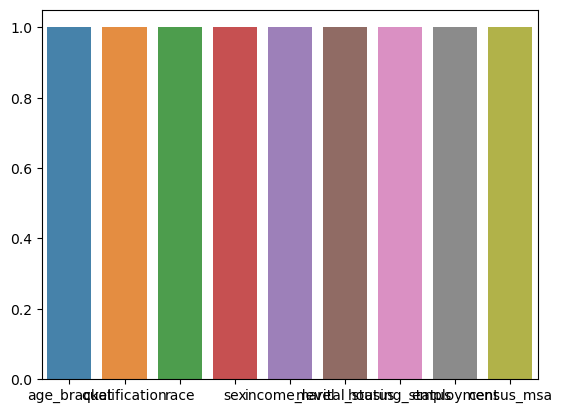

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


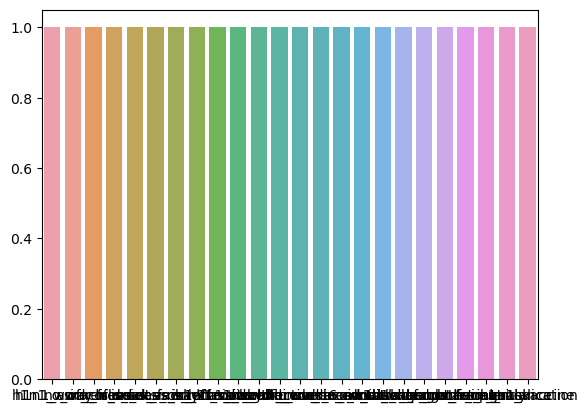

AttributeError: Can only use .cat accessor with a 'category' dtype

In [20]:
data_numeric.head()
data_numeric.dtypes
data_clean_numeric = data_numeric.apply(lambda 
x: x.fillna(x.value_counts().index[0]))
data_clean_numeric.head()
data_clean_numeric.isna().sum()
data_clean_numeric.dtypes
data_clean_numeric = data_clean_numeric.astype('category')
data_clean_numeric.head()
data_clean_numeric['h1n1_worry'].value_counts()
category_count = data_clean_category.columns.value_counts()

sns.barplot(category_count.index,category_count.values,alpha=0.9)

plt.show()
numeric_count = data_clean_numeric.columns.value_counts()
sns.barplot(numeric_count.index,numeric_count.values,alpha=0.9)

plt.show()
data_clean_category.columns
data_clean_numeric.columns
data_clean_category.dtypes
data_clean_numeric.dtypes
data_clean_category
data_clean_category['age_bracket'] = data_clean_category['age_bracket'].cat.codes

data_clean_category['qualification'] =data_clean_category['qualification'].cat.codes

data_clean_category['race']=data_clean_category['race'].cat.codes

data_clean_category['sex']=data_clean_category['sex'].cat.codes

data_clean_category['income_level']=data_clean_category['income_level'].cat.codes

data_clean_category['marital_status']=data_clean_category['marital_status'].cat.codes
data_clean_category['housing_status']=data_clean_category['housing_status'].cat.codes
data_clean_category['employment']=data_clean_category['employment'].cat.codes

data_clean_category['census_msa'] = data_clean_category['census_msa'].cat.codes

data_clean_category.head()
data_clean_numeric.isna().sum()
data_clean_numeric = data_clean_numeric.apply(lambda x: x.fillna(x.value_counts().index[0]))
data_clean_numeric.isna().sum()
print(type(data_clean_category))
print(type(data_clean_numeric))


In [21]:
covid_data = pd.concat([data_clean_category,data_clean_numeric],
                       join='outer',
                      axis=1)

covid_data.head()
covid_data.corr()
X = covid_data.iloc[:,:-1]

y = covid_data.iloc[:,-1]
X.shape,y.shape


((26707, 32), (26707,))

pandas.core.frame.DataFrame

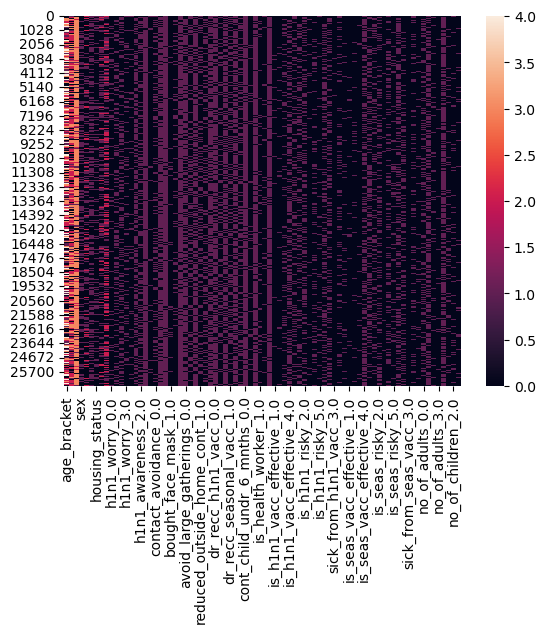

In [22]:
X = pd.get_dummies(X)
X.shape
X.head()
sns.heatmap(X)
covid = pd.concat([X,y],axis=1)
covid.head()
type(covid)



In [25]:
X = covid.iloc[:,:-1].values  #features

y = covid.iloc[:,-1].values    #target
X,y,X.shape,y.shape
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)
ytest
ypred
model.coef_   #Weights or coefficient
model.intercept_

from sklearn import model_selection 
 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
print(sklearn.metrics.accuracy_score(ytest,ypred))
print(sklearn.metrics.classification_report(ytest,ypred))
print(sklearn.metrics.confusion_matrix(ytest,ypred))
(4049+430) / (4049+194+669+430)
Vaccinators = pd.DataFrame(ypred)  #ypred is in array.It needs to be converted to DataFrame

Vaccinators.value_counts()
print('Default Logistic Regression Accuracy Training Score',model.score(Xtrain,ytrain))
print('Default Logistic Regression Accuracy Test Score',model.score(Xtest,ytest))


0.832646948708349
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.67      0.41      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342

[[3980  232]
 [ 662  468]]
Default Logistic Regression Accuracy Training Score 0.8368359466417037
Default Logistic Regression Accuracy Test Score 0.832646948708349


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X = covid.iloc[:,:-1].values  #features

y = covid.iloc[:,-1].values    #target
X,y,X.shape,y.shape
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)
ytest
ypred
model.coef_   #Weights or coefficient
model.intercept_

from sklearn import model_selection 
 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
print(sklearn.metrics.accuracy_score(ytest,ypred))
print(sklearn.metrics.classification_report(ytest,ypred))
print(sklearn.metrics.confusion_matrix(ytest,ypred))
(4049+430) / (4049+194+669+430)
Vaccinators = pd.DataFrame(ypred)  #ypred is in array.It needs to be converted to DataFrame

Vaccinators.value_counts()
print('Default Logistic Regression Accuracy Training Score',model.score(Xtrain,ytrain))
print('Default Logistic Regression Accuracy Test Score',model.score(Xtest,ytest))


0.8382628229127668
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4186
           1       0.71      0.43      0.54      1156

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.82      5342

[[3976  210]
 [ 654  502]]
Default Logistic Regression Accuracy Training Score 0.8363678914111865
Default Logistic Regression Accuracy Test Score 0.8382628229127668


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
covid.shape  #Checking records and variables
import statsmodels.api as sm
from statsmodels.formula.api import logit  #We want to use Logistic Regression in StatsModels
covid_float = covid.astype('float')  #statsmodels require dataset to have float values
x =covid_float.iloc[:,:-1]

y = covid_float.iloc[:,-1]
mle_model = logit("y~X",covid_float,).fit()   #Equation of MLE using statsmodels
print(mle_model.summary())
print(mle_model.summary2())
mle_model.pred_table()    #Build Confusion Matrix
accuracy = (19942+2398)/(19942+1091+3276+2398)
accuracy
mle_model.aic


         Current function value: 0.382266
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26707
Model:                          Logit   Df Residuals:                    26649
Method:                           MLE   Df Model:                           57
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2609
Time:                        18:28:55   Log-Likelihood:                -10209.
converged:                      False   LL-Null:                       -13813.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1726        nan        nan        nan         nan         nan
X[0]           0.1107      0.017      6.708      0.000       0.07

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.261     
Dependent Variable:    y                   AIC:                 20534.3752
Date:                  2023-03-16 18:28    BIC:                 21009.5507
No. Observations:      26707               Log-Likelihood:      -10209.   
Df Model:              57                  LL-Null:             -13813.   
Df Residuals:          26649               LLR p-value:         0.0000    
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.1726          nan     nan    nan            nan           nan
X[0]       0.1107       0.0165  6.7083 0.0000         0

20534.375217681893

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier
SGDClassifier(def_init__(loss='hinge', penalty='12', alpha=0.0001, l1_ratio=0.15, 
fit_intercept=True,  max_iter=1000, tol=0.001, shuffle=True, verbose=0, 
epsilon=DEFAULT_EPSILON, n_jobs=None, random_state=None, 
learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, 
validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False))
sgd_classifier = SGDClassifier(loss='hinge',
                               penalty='l2',
                               max_iter=1000)
sgd_classifier
sgd_classifier.fit(Xtrain,ytrain)
print('Training Accuracy Score',sgd_classifier.score(Xtrain,ytrain))
print('Validation Accuracy Score',sgd_classifier.score(Xtest,ytest))
sgd_classifier.predict(Xtest)
sgd_classifier.coef_
sgd_classifier.intercept_
sgd_classifier.decision_function(Xtest)


NameError: name 'def_init__' is not defined

In [42]:
sgd_classifier = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,        fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal', loss='log',
                               max_iter=5, n_iter_no_change=5, n_jobs=None, penalty='l2',
                               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0, warm_start=False).fit(Xtrain,ytrain)
sgd_classifier.predict_proba(Xtest)
print(sgd_classifier.predict_proba(Xtest))
sgd_ypred = sgd_classifier.predict(Xtest)
sklearn.metrics.accuracy_score(ytest,sgd_ypred)


[[0.99853583 0.00146417]
 [0.95563067 0.04436933]
 [0.38251012 0.61748988]
 ...
 [0.89734789 0.10265211]
 [0.997375   0.002625  ]
 [0.99445545 0.00554455]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8232871583676525

In [44]:
#Step 5: Build models 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Spot Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
# evaluate each model in turn 
results = [] 
names = [] 
for name, model in models: 
 kfold = model_selection.KFold(n_splits=10, random_state=None) 
 cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy') 
 results.append(cv_results) 
 names.append(name) 
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
 print(msg)
#Now we can make prediction on most accurate model 
# Make predictions on validation dataset 
rf = RandomForestClassifier() 
rf.fit(Xtrain, ytrain) 
predictions = rf.predict(Xtest) 
print(accuracy_score(ytest, predictions)) 
print(confusion_matrix(ytest, predictions)) 
print(classification_report(ytest, predictions))



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.835572 (0.007657)
LDA: 0.832530 (0.006786)


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNN: 0.808004 (0.008496)
CART: 0.744675 (0.007583)
NB: 0.701005 (0.008920)


In [2]:
pwd


'C:\\Users\\user'